<a href="https://colab.research.google.com/github/shalinramduth/ST444-Project/blob/main/different_number_of_processes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
from sklearn import tree
import concurrent.futures as cf
import multiprocessing
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
file = "https://raw.githubusercontent.com/shalinramduth/ST444-Project/main/ObesityDataSet_raw_and_data_sinthetic.csv"
df = pd.read_csv(file)


# Round age, and Weight to integer; Round Height to 2 decimal places; As for other float64-type varialbes, they should be integer
integer = ["Age", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]
df[integer] = df[integer].apply(np.int64)
df = df.round({"Height": 2})


# convert categorical variables
for column in df.columns:
  if df[column].dtypes == "object":
    df[column] = pd.factorize(df[column])[0]
        
# define x and y
x = df[df.columns[0:16]]; y = df[df.columns[16]]

# split the data into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 1)

#times = list(np.linspace(100, 5000, num=20)) # create equal spaced sample size

times = [int(10**(2+0.2*x)) for x in range(11)] # convert times to integer
print(times)

y_test = np.array(list(y_test))
#[100, 246, 392, 538, 684, 830, 976, 1122, 1268, 1414]

# the decision tree classifier function
def f(n):
  X = x_train.sample(n=n,replace=True) # sample from training dataset
  Y = y_train.loc[list(X.index)] #get corresponding Y
    
    # fit the decision tree
  clf = tree.DecisionTreeClassifier()
  clf = clf.fit(X, Y) # fit the decision tree with the sample drawn
    
    # predict the obesity level with the decision tree
  y_predict = clf.predict(x_test)
    
  return (y_predict)

# decision tree (without bagging/bootstrap)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)

print('The accuracy rate of decision tree is ', accuracy_score(y_test, y_predict))
workers = [2,4,8,16]
ac = []; ti = [] # empty list to store accuracy score, and time taken

# multi-processing function
def mult(n,m,w):

  #n is how large each sample is, m is how many samples are taken
  inputs = [n]*m

  if __name__ == "__main__":
    #uses current.futures module instead of multiprocessing
    with cf.ProcessPoolExecutor(max_workers = w) as ex:
            #timing
      start = time.perf_counter()

            #uses map to map the function to the inputs and put into results list
      results = ex.map(f, inputs)
            
            #predicting the class
      pred = np.rint((np.mean([x for x in results], axis = 0)))

            #printing accuracy
      accu = accuracy_score(list(y_test),pred)

      finish = time.perf_counter()

            #time taken
      t = finish - start
            
      ac.append(accu)
      ti.append(t)
# create a dataframe the store the result
df_time = pd.DataFrame(columns = ['sample size'])
df_time['sample size'] = times
# df_time
for y in workers:
  ti = []
  ac = []
  for x in times:
    mult(1000, x,y)
  df_time['time taken ({} workers)'.format(y)] = ti
  df_time['accuracy ({} workers)'.format(y)] = ac

df_time

[100, 158, 251, 398, 630, 1000, 1584, 2511, 3981, 6309, 10000]
The accuracy rate of decision tree is  0.9469153515064562


,sample size,time taken (2 workers),accuracy (2 workers),time taken (4 workers),accuracy (4 workers),time taken (8 workers),accuracy (8 workers),time taken (16 workers),accuracy (16 workers)
0,100,0.456370,0.909613,0.490752,0.913917,0.568504,0.921090,0.701602,0.919656
1,158,0.697716,0.911047,0.736668,0.906743,0.823355,0.913917,0.956218,0.912482
2,251,1.058541,0.915352,1.123813,0.906743,1.262010,0.908178,1.382869,0.908178
3,398,1.705084,0.916786,1.793384,0.912482,1.888484,0.909613,2.022353,0.913917
4,630,2.644978,0.913917,2.815836,0.919656,2.920697,0.911047,3.058000,0.906743
5,1000,4.383047,0.923960,4.392422,0.915352,4.631975,0.915352,4.825991,0.905308
6,1584,6.671541,0.919656,6.912798,0.915352,7.147346,0.916786,7.330786,0.912482
7,2511,10.595589,0.919656,10.920166,0.916786,11.134670,0.915352,11.455938,0.919656
8,3981,16.757577,0.921090,17.387217,0.919656,17.767777,0.923960,18.187285,0.915352
9,6309,26.635964,0.921090,27.565644,0.921090,27.929407,0.919656,28.627019,0.915352


In [ ]:
# for non-parallel computing
t2 = []; ac2 = []

for x in times: #n in parallel computing function
  start = time.perf_counter()
  q = []
  for y in range(x): #m in parallel computing function   
    t=f(1000)
    q.append(t)
  pred = np.rint((np.mean(q, axis = 0)))
  finish = time.perf_counter()
    
  t2.append(finish - start)
  ac2.append(accuracy_score(list(y_test),pred))

df_time['time taken (non-parallel)'] = t2
df_time['accuracy (non-parallel)'] = ac2
df_time

,sample size,time taken (2 workers),accuracy (2 workers),time taken (4 workers),accuracy (4 workers),time taken (8 workers),accuracy (8 workers),time taken (16 workers),accuracy (16 workers),time taken (non-parallel),accuracy (non-parallel)
0,100,0.456370,0.909613,0.490752,0.913917,0.568504,0.921090,0.701602,0.919656,0.496556,0.913917
1,158,0.697716,0.911047,0.736668,0.906743,0.823355,0.913917,0.956218,0.912482,0.774282,0.919656
2,251,1.058541,0.915352,1.123813,0.906743,1.262010,0.908178,1.382869,0.908178,1.242973,0.926829
3,398,1.705084,0.916786,1.793384,0.912482,1.888484,0.909613,2.022353,0.913917,1.975881,0.915352
4,630,2.644978,0.913917,2.815836,0.919656,2.920697,0.911047,3.058000,0.906743,3.092797,0.915352
5,1000,4.383047,0.923960,4.392422,0.915352,4.631975,0.915352,4.825991,0.905308,4.898920,0.922525
6,1584,6.671541,0.919656,6.912798,0.915352,7.147346,0.916786,7.330786,0.912482,7.727187,0.922525
7,2511,10.595589,0.919656,10.920166,0.916786,11.134670,0.915352,11.455938,0.919656,12.241160,0.923960
8,3981,16.757577,0.921090,17.387217,0.919656,17.767777,0.923960,18.187285,0.915352,19.489565,0.922525
9,6309,26.635964,0.921090,27.565644,0.921090,27.929407,0.919656,28.627019,0.915352,31.668454,0.921090


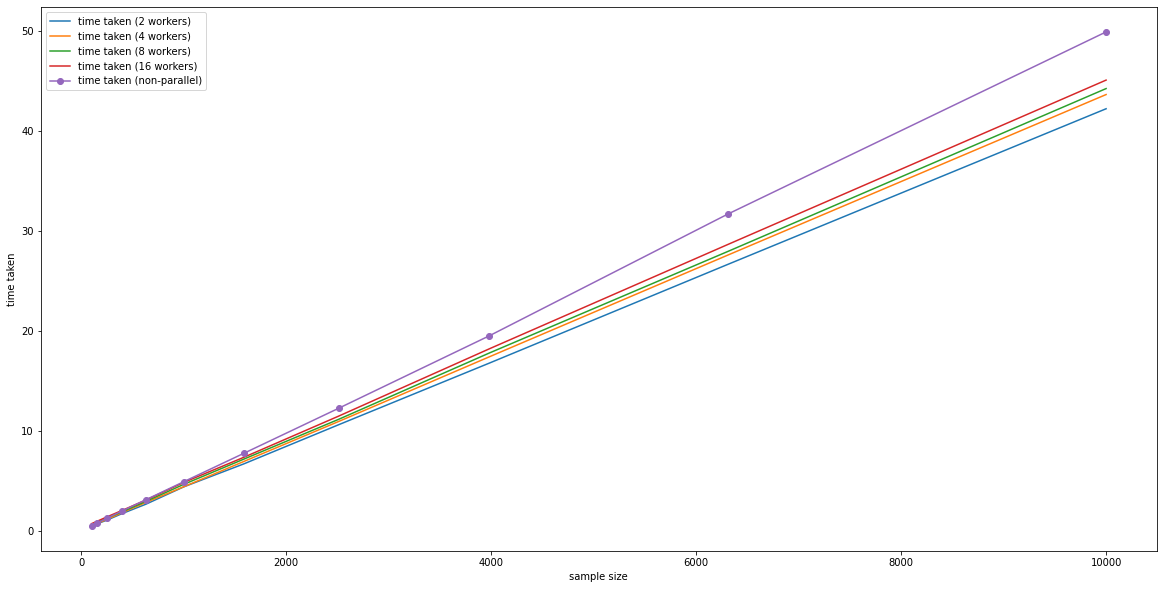

In [ ]:
# visualization of time taken for the whole process
plt.figure(figsize = (20,10))
for x in workers:
  plt.plot('sample size', 'time taken ({} workers)'.format(x), data=df_time, marker = '')

plt.plot('sample size', 'time taken (non-parallel)', data=df_time, marker = 'o')
#plt.plot()

plt.legend()
plt.xlabel('sample size'); plt.ylabel('time taken')

plt.show()

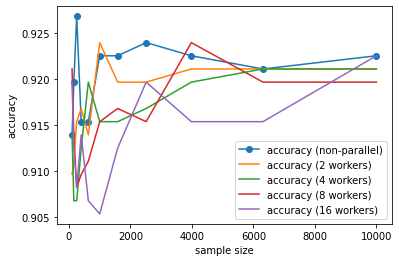

In [ ]:
plt.plot('sample size', 'accuracy (non-parallel)', data=df_time, marker = 'o')
for x in workers:
  plt.plot('sample size', 'accuracy ({} workers)'.format(x), data=df_time, marker = '')


plt.legend()
plt.xlabel('sample size'); plt.ylabel('accuracy')

plt.show()

In [ ]:
# create a dataframe the store the result
df_time2 = pd.DataFrame(columns = ['no of samples'])
df_time2['no of samples'] = times
# df_time
for y in workers:
  ti = []
  ac = []
  for x in times:
    mult(x, 1000,y)
  df_time2['time taken ({} workers)'.format(y)] = ti
  df_time2['accuracy ({} workers)'.format(y)] = ac

df_time2

,no of samples,sample size,time taken (2 workers),accuracy (2 workers),time taken (4 workers),accuracy (4 workers),time taken (8 workers),accuracy (8 workers),time taken (16 workers),accuracy (16 workers),time taken (non-parallel),accuracy (non-parallel)
0,100,100,2.483580,0.700143,2.583922,0.692970,2.802222,0.681492,2.921031,0.692970,2.617265,0.698709
1,158,158,2.682133,0.797704,2.735143,0.790531,2.879143,0.790531,3.031949,0.793400,2.709204,0.789096
2,251,251,2.777483,0.863702,3.039610,0.868006,3.079933,0.862267,3.312010,0.852224,2.962484,0.863702
3,398,398,3.078505,0.880918,3.233182,0.879484,3.488457,0.873745,3.531234,0.873745,3.406799,0.879484
4,630,630,3.544599,0.898135,3.711488,0.901004,3.847805,0.901004,4.110004,0.899570,4.026505,0.889527
5,1000,1000,4.221675,0.919656,4.356923,0.919656,4.517380,0.919656,4.702031,0.916786,4.973542,0.921090
6,1584,1584,5.260853,0.929699,5.445715,0.935438,5.575817,0.931133,5.699836,0.936872,6.347182,0.938307
7,2511,2511,6.896321,0.949785,6.958893,0.948350,7.250678,0.944046,7.316458,0.944046,8.470269,0.946915
8,3981,3981,9.176702,0.948350,9.432925,0.942611,9.595791,0.942611,9.783463,0.942611,11.413967,0.948350
9,6309,6309,12.875953,0.949785,13.074009,0.949785,13.314504,0.942611,13.634651,0.942611,15.836320,0.949785


In [ ]:
# for non-parallel computing
t22 = []; ac22 = []

for x in times: #n in parallel computing function
  start = time.perf_counter()
  q = []
  for y in range(1000): #m in parallel computing function   
    t=f(x)
    q.append(t)
  pred = np.rint((np.mean(q, axis = 0)))
  finish = time.perf_counter()
    
  t22.append(finish - start)
  ac22.append(accuracy_score(list(y_test),pred))

df_time2['time taken (non-parallel)'] = t22
df_time2['accuracy (non-parallel)'] = ac22
df_time2

,no of samples,sample size,time taken (2 workers),accuracy (2 workers),time taken (4 workers),accuracy (4 workers),time taken (8 workers),accuracy (8 workers),time taken (16 workers),accuracy (16 workers),time taken (non-parallel),accuracy (non-parallel)
0,100,100,2.483580,0.700143,2.583922,0.692970,2.802222,0.681492,2.921031,0.692970,2.617265,0.698709
1,158,158,2.682133,0.797704,2.735143,0.790531,2.879143,0.790531,3.031949,0.793400,2.709204,0.789096
2,251,251,2.777483,0.863702,3.039610,0.868006,3.079933,0.862267,3.312010,0.852224,2.962484,0.863702
3,398,398,3.078505,0.880918,3.233182,0.879484,3.488457,0.873745,3.531234,0.873745,3.406799,0.879484
4,630,630,3.544599,0.898135,3.711488,0.901004,3.847805,0.901004,4.110004,0.899570,4.026505,0.889527
5,1000,1000,4.221675,0.919656,4.356923,0.919656,4.517380,0.919656,4.702031,0.916786,4.973542,0.921090
6,1584,1584,5.260853,0.929699,5.445715,0.935438,5.575817,0.931133,5.699836,0.936872,6.347182,0.938307
7,2511,2511,6.896321,0.949785,6.958893,0.948350,7.250678,0.944046,7.316458,0.944046,8.470269,0.946915
8,3981,3981,9.176702,0.948350,9.432925,0.942611,9.595791,0.942611,9.783463,0.942611,11.413967,0.948350
9,6309,6309,12.875953,0.949785,13.074009,0.949785,13.314504,0.942611,13.634651,0.942611,15.836320,0.949785


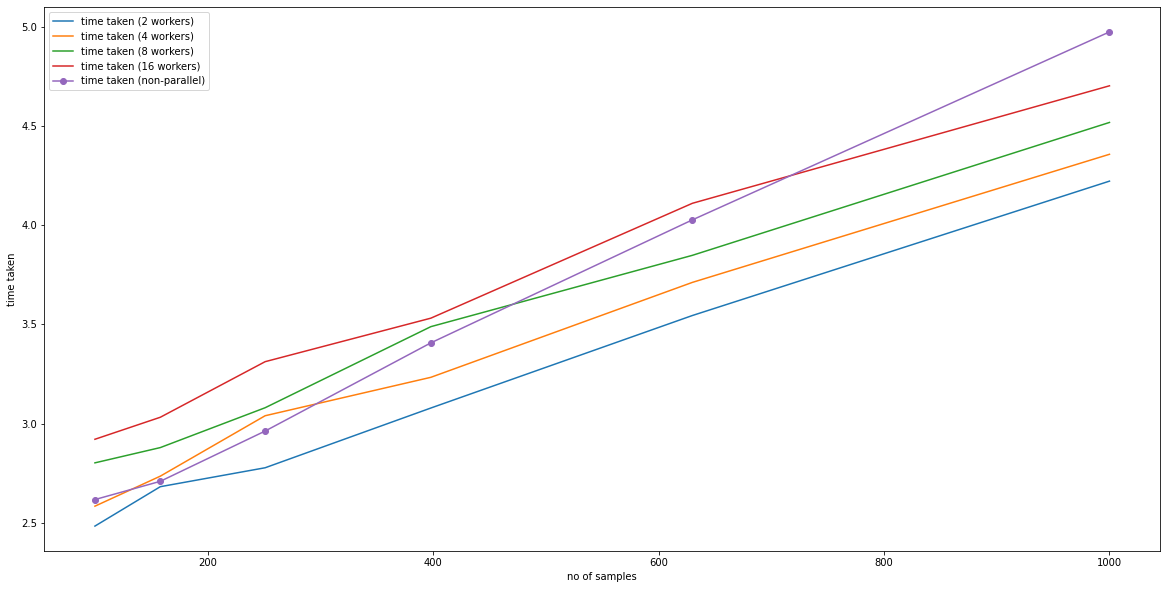

In [ ]:
# visualization of time taken for the whole process
plt.figure(figsize = (20,10))
for x in workers:
  plt.plot('no of samples', 'time taken ({} workers)'.format(x), data=df_time2.iloc[:6], marker = '')

plt.plot('no of samples', 'time taken (non-parallel)', data=df_time2.iloc[:6], marker = 'o')
#plt.plot()

plt.legend()
plt.xlabel('no of samples'); plt.ylabel('time taken')

plt.show()

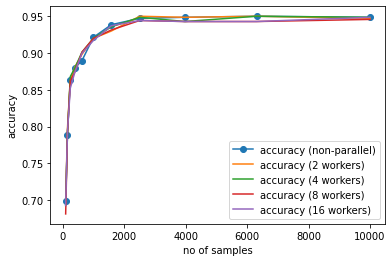

In [ ]:
plt.plot('no of samples', 'accuracy (non-parallel)', data=df_time2, marker = 'o')
for x in workers:
  plt.plot('no of samples', 'accuracy ({} workers)'.format(x), data=df_time2, marker = '')


plt.legend()
plt.xlabel('no of samples'); plt.ylabel('accuracy')

plt.show()

[7.751612227636294, 6.4907014768182725, 6.672739920000078, 6.863531949999924, 7.075403668545567]


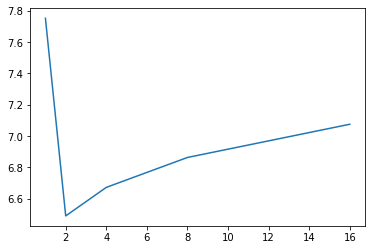

In [ ]:
#for changing n
df_time2.shape
nm = []
nm.append(df_time2['time taken (non-parallel)'].mean())
for x in workers:
  nm.append(df_time2['time taken ({} workers)'.format(x)].mean())
print(nm)
plt.plot([1]+workers,nm)
plt.show()

[12.136230938909069, 10.346391786636229, 10.705800922727162, 10.936046058999967, 11.238077260363836]


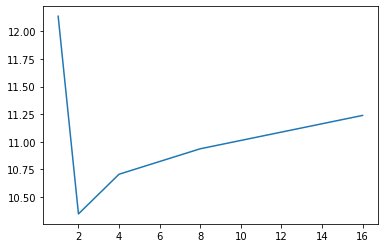

In [ ]:
#for changing m

mm = []
mm.append(df_time['time taken (non-parallel)'].mean())
for x in workers:
  mm.append(df_time['time taken ({} workers)'.format(x)].mean())
print(mm)
plt.plot([1]+workers,mm)
plt.show()

In [ ]:
df_time2.iloc[:5]

,no of samples,sample size,time taken (2 workers),accuracy (2 workers),time taken (4 workers),accuracy (4 workers),time taken (8 workers),accuracy (8 workers),time taken (16 workers),accuracy (16 workers),time taken (non-parallel),accuracy (non-parallel)
0,100,100,2.483580,0.700143,2.583922,0.692970,2.802222,0.681492,2.921031,0.692970,2.617265,0.698709
1,158,158,2.682133,0.797704,2.735143,0.790531,2.879143,0.790531,3.031949,0.793400,2.709204,0.789096
2,251,251,2.777483,0.863702,3.039610,0.868006,3.079933,0.862267,3.312010,0.852224,2.962484,0.863702
3,398,398,3.078505,0.880918,3.233182,0.879484,3.488457,0.873745,3.531234,0.873745,3.406799,0.879484
4,630,630,3.544599,0.898135,3.711488,0.901004,3.847805,0.901004,4.110004,0.899570,4.026505,0.889527
